## 上場廃止された銘柄の特徴量を見つける

In [1]:
import json

with open("data/all_delisted_data.json") as f:
    delisted_data = json.load(f)

with open("data/all_formatted_pre_data.json") as f:
    all_data = json.load(f)
    

In [88]:
len(all_data)

303

In [2]:
import pandas as pd

delisted_dataframe = pd.DataFrame({
    "id": [],
    "time": [],
    "price": [],
    "volume": [],
})

all_data_dataframe = pd.DataFrame({
    "id": [],
    "time": [],
    "price": [],
    "volume": [],
})



In [3]:
delisted_dataframe

,id,time,price,volume


In [4]:
for i, (key, value) in enumerate(delisted_data.items()):
    format_data = []
    for j in range(len(value["price"])):
        time = j + 1
        add_list = [key, time, value["price"][j], value["volume"][j]]
        format_data.append(add_list)
    format_dataframe = pd.DataFrame(format_data, columns=["id", "time", "price", "volume"])
    delisted_dataframe = pd.concat([delisted_dataframe, format_dataframe])

for i, (key, value) in enumerate(all_data.items()):
    format_data = []
    for j in range(len(value["price"])):
        time = j + 1
        add_list = [key, time, value["price"][j], value["volume"][j]]
        format_data.append(add_list)
    format_all_dataframe = pd.DataFrame(format_data, columns=["id", "time", "price", "volume"])
    all_data_dataframe = pd.concat([all_data_dataframe, format_all_dataframe])


In [5]:
all_data_dataframe

,id,time,price,volume
0,0x,1.0,0.148432,7.727619e+06
1,0x,2.0,0.150935,5.606027e+06
2,0x,3.0,0.156295,7.495835e+06
3,0x,4.0,0.154527,7.041316e+06
4,0x,5.0,0.158480,8.037633e+06
...,...,...,...,...
360,zilliqa,361.0,0.027456,3.920566e+07
361,zilliqa,362.0,0.027098,3.107068e+07
362,zilliqa,363.0,0.025773,3.000536e+07
363,zilliqa,364.0,0.025203,2.670580e+07


### 特徴量生成

In [6]:
from tsfresh.feature_extraction import extract_features

delisted_features = extract_features(
    timeseries_container=delisted_dataframe,
    default_fc_parameters=None,
    column_id='id',
    column_sort='time',
    column_kind=None,
    column_value=None
)


Feature Extraction: 100%|██████████| 20/20 [00:02<00:00,  9.09it/s]


In [7]:
all_features = extract_features(
    timeseries_container=all_data_dataframe,
    default_fc_parameters=None,
    column_id='id',
    column_sort='time',
    column_kind=None,
    column_value=None
)

Feature Extraction: 100%|██████████| 20/20 [00:14<00:00,  1.43it/s]


In [8]:
all_features

,price__variance_larger_than_standard_deviation,price__has_duplicate_max,price__has_duplicate_min,price__has_duplicate,price__sum_values,price__abs_energy,price__mean_abs_change,price__mean_change,price__mean_second_derivative_central,price__median,...,volume__fourier_entropy__bins_5,volume__fourier_entropy__bins_10,volume__fourier_entropy__bins_100,volume__permutation_entropy__dimension_3__tau_1,volume__permutation_entropy__dimension_4__tau_1,volume__permutation_entropy__dimension_5__tau_1,volume__permutation_entropy__dimension_6__tau_1,volume__permutation_entropy__dimension_7__tau_1,volume__query_similarity_count__query_None__threshold_0.0,volume__mean_n_absolute_max__number_of_maxima_7
0x,0.0,0.0,0.0,0.0,89.836311,2.407345e+01,0.008761,0.000598,-4.668805e-06,0.223869,...,0.540089,1.094548,2.941937,1.771557,3.101465,4.510091,5.451930,5.812357,NaN,4.305479e+08
1inch,0.0,0.0,0.0,0.0,141.427970,5.914587e+01,0.011150,0.000100,-1.878641e-05,0.370455,...,0.658457,1.332596,3.285332,1.762874,3.073275,4.480604,5.507629,5.825399,NaN,2.368024e+08
aave,1.0,0.0,0.0,0.0,27085.820106,2.085233e+06,2.186513,0.163535,-1.319923e-03,71.809720,...,0.170467,0.280179,1.915986,1.773811,3.088178,4.464134,5.412862,5.780007,NaN,3.780062e+08
aavegotchi,0.0,0.0,0.0,0.0,357.458821,3.615316e+02,0.022732,0.000054,-1.681363e-05,0.951473,...,0.090729,0.170467,1.502194,1.779683,3.123421,4.550992,5.524486,5.796911,NaN,2.954383e+07
acala,0.0,0.0,0.0,0.0,28.041789,2.529180e+00,0.003008,-0.000025,-8.500670e-06,0.064555,...,0.462064,0.956517,2.989920,1.769840,3.107886,4.468669,5.415018,5.762157,NaN,6.441962e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yield-guild-games,0.0,0.0,0.0,0.0,93.398235,2.632544e+01,0.013954,0.000749,-1.220780e-07,0.240865,...,0.136002,0.345572,1.400118,1.767838,3.075427,4.445525,5.400098,5.780007,NaN,3.413985e+08
zcash,1.0,0.0,0.0,0.0,12059.791208,4.149911e+05,0.825926,-0.023480,2.697667e-04,31.149378,...,0.090729,0.136002,0.802504,1.781390,3.140541,4.596921,5.586175,5.860153,NaN,9.924313e+07
zcoin,0.0,0.0,0.0,0.0,669.637091,1.266519e+03,0.048500,0.001855,-2.296285e-05,1.765515,...,0.591523,1.162309,3.168464,1.766694,3.077769,4.435435,5.440252,5.795453,NaN,2.561351e+07
zelcash,0.0,0.0,0.0,0.0,188.434883,1.068117e+02,0.017818,0.000478,-4.739567e-05,0.492453,...,0.902982,1.550245,3.424724,1.761143,3.075840,4.448160,5.378639,5.737530,NaN,6.487080e+07


In [9]:
from tsfresh.utilities.dataframe_functions import impute

impute(delisted_features)
impute(all_features)


/Users/hiroki/anaconda3/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['price__query_similarity_count__query_None__threshold_0.0'
 'volume__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
/Users/hiroki/anaconda3/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['price__query_similarity_count__query_None__threshold_0.0'
 'volume__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,price__variance_larger_than_standard_deviation,price__has_duplicate_max,price__has_duplicate_min,price__has_duplicate,price__sum_values,price__abs_energy,price__mean_abs_change,price__mean_change,price__mean_second_derivative_central,price__median,...,volume__fourier_entropy__bins_5,volume__fourier_entropy__bins_10,volume__fourier_entropy__bins_100,volume__permutation_entropy__dimension_3__tau_1,volume__permutation_entropy__dimension_4__tau_1,volume__permutation_entropy__dimension_5__tau_1,volume__permutation_entropy__dimension_6__tau_1,volume__permutation_entropy__dimension_7__tau_1,volume__query_similarity_count__query_None__threshold_0.0,volume__mean_n_absolute_max__number_of_maxima_7
0x,0.0,0.0,0.0,0.0,89.836311,2.407345e+01,0.008761,0.000598,-4.668805e-06,0.223869,...,0.540089,1.094548,2.941937,1.771557,3.101465,4.510091,5.451930,5.812357,0.0,4.305479e+08
1inch,0.0,0.0,0.0,0.0,141.427970,5.914587e+01,0.011150,0.000100,-1.878641e-05,0.370455,...,0.658457,1.332596,3.285332,1.762874,3.073275,4.480604,5.507629,5.825399,0.0,2.368024e+08
aave,1.0,0.0,0.0,0.0,27085.820106,2.085233e+06,2.186513,0.163535,-1.319923e-03,71.809720,...,0.170467,0.280179,1.915986,1.773811,3.088178,4.464134,5.412862,5.780007,0.0,3.780062e+08
aavegotchi,0.0,0.0,0.0,0.0,357.458821,3.615316e+02,0.022732,0.000054,-1.681363e-05,0.951473,...,0.090729,0.170467,1.502194,1.779683,3.123421,4.550992,5.524486,5.796911,0.0,2.954383e+07
acala,0.0,0.0,0.0,0.0,28.041789,2.529180e+00,0.003008,-0.000025,-8.500670e-06,0.064555,...,0.462064,0.956517,2.989920,1.769840,3.107886,4.468669,5.415018,5.762157,0.0,6.441962e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yield-guild-games,0.0,0.0,0.0,0.0,93.398235,2.632544e+01,0.013954,0.000749,-1.220780e-07,0.240865,...,0.136002,0.345572,1.400118,1.767838,3.075427,4.445525,5.400098,5.780007,0.0,3.413985e+08
zcash,1.0,0.0,0.0,0.0,12059.791208,4.149911e+05,0.825926,-0.023480,2.697667e-04,31.149378,...,0.090729,0.136002,0.802504,1.781390,3.140541,4.596921,5.586175,5.860153,0.0,9.924313e+07
zcoin,0.0,0.0,0.0,0.0,669.637091,1.266519e+03,0.048500,0.001855,-2.296285e-05,1.765515,...,0.591523,1.162309,3.168464,1.766694,3.077769,4.435435,5.440252,5.795453,0.0,2.561351e+07
zelcash,0.0,0.0,0.0,0.0,188.434883,1.068117e+02,0.017818,0.000478,-4.739567e-05,0.492453,...,0.902982,1.550245,3.424724,1.761143,3.075840,4.448160,5.378639,5.737530,0.0,6.487080e+07


In [97]:
delisted_features

,price__variance_larger_than_standard_deviation,price__has_duplicate_max,price__has_duplicate_min,price__has_duplicate,price__sum_values,price__abs_energy,price__mean_abs_change,price__mean_change,price__mean_second_derivative_central,price__median,...,volume__fourier_entropy__bins_5,volume__fourier_entropy__bins_10,volume__fourier_entropy__bins_100,volume__permutation_entropy__dimension_3__tau_1,volume__permutation_entropy__dimension_4__tau_1,volume__permutation_entropy__dimension_5__tau_1,volume__permutation_entropy__dimension_6__tau_1,volume__permutation_entropy__dimension_7__tau_1,volume__query_similarity_count__query_None__threshold_0.0,volume__mean_n_absolute_max__number_of_maxima_7
aragon,1.0,0.0,0.0,0.0,1.414492e+03,5.868777e+03,9.395431e-02,9.890847e-03,7.667163e-06,4.040271e+00,...,0.590280,0.994236,2.801703,1.759567,3.059976,4.439868,5.415452,5.803176,0.0,3.683337e+07
barnbridge,0.0,0.0,0.0,0.0,1.325409e+03,5.093452e+03,1.426648e-01,3.609438e-03,-2.997064e-04,3.761422e+00,...,0.721165,1.242835,3.303576,1.763336,3.097464,4.475725,5.460476,5.809953,0.0,1.814015e+08
concentrated-voting-power,0.0,0.0,0.0,0.0,1.352858e+02,5.205617e+01,1.032753e-02,1.188940e-04,-2.067538e-05,3.447385e-01,...,0.090729,0.342636,2.268711,1.776000,3.094216,4.469929,5.422452,5.781465,0.0,4.706483e+07
drep-new,0.0,0.0,0.0,0.0,1.205273e+02,4.271473e+01,1.132610e-02,-4.959453e-05,-6.134028e-08,3.044581e-01,...,0.691031,1.332558,3.348823,1.771311,3.087908,4.508233,5.499226,5.840845,0.0,1.438373e+08
ethos,0.0,0.0,0.0,0.0,7.989238e+01,2.350161e+01,9.737428e-03,-4.376519e-04,9.341844e-07,1.461312e-01,...,0.200814,0.409490,1.973507,1.747050,3.034123,4.369564,5.395496,5.791592,0.0,1.725039e+08
force-protocol,0.0,0.0,0.0,0.0,7.338900e+00,1.498869e-01,5.399824e-04,2.210318e-05,2.407394e-07,1.957066e-02,...,0.880241,1.531166,3.429977,1.747052,3.043346,4.426794,5.378317,5.742338,0.0,3.975546e+07
keep3rv1,1.0,0.0,0.0,0.0,2.362854e+04,1.609065e+06,1.864408e+00,5.438066e-02,1.768562e-03,6.477880e+01,...,0.775725,1.434155,3.521443,1.767132,3.112738,4.538980,5.455923,5.803176,0.0,6.407389e+07
loom-network-new,0.0,0.0,0.0,0.0,2.715052e+01,2.755343e+00,3.715417e-03,1.859350e-04,-1.371664e-06,5.590131e-02,...,0.300740,0.798695,2.888962,1.753936,3.062342,4.477776,5.432353,5.772284,0.0,5.822439e+08
mobster,0.0,0.0,0.0,1.0,8.094261e-08,9.416130e-16,1.116876e-09,-7.665500e-13,-2.075271e-14,3.071201e-10,...,0.446244,0.766875,1.676139,1.686251,2.680818,3.406365,3.727905,3.840019,0.0,4.223954e+04
monero,1.0,0.0,0.0,0.0,5.751626e+04,9.103369e+06,2.354415e+00,5.038380e-02,-3.330909e-03,1.573760e+02,...,0.307703,0.625686,2.154047,1.780059,3.121606,4.507879,5.461662,5.809953,0.0,1.632295e+08


In [98]:
all_features

,price__variance_larger_than_standard_deviation,price__has_duplicate_max,price__has_duplicate_min,price__has_duplicate,price__sum_values,price__abs_energy,price__mean_abs_change,price__mean_change,price__mean_second_derivative_central,price__median,...,volume__fourier_entropy__bins_5,volume__fourier_entropy__bins_10,volume__fourier_entropy__bins_100,volume__permutation_entropy__dimension_3__tau_1,volume__permutation_entropy__dimension_4__tau_1,volume__permutation_entropy__dimension_5__tau_1,volume__permutation_entropy__dimension_6__tau_1,volume__permutation_entropy__dimension_7__tau_1,volume__query_similarity_count__query_None__threshold_0.0,volume__mean_n_absolute_max__number_of_maxima_7
0x,0.0,0.0,0.0,0.0,89.836311,2.407345e+01,0.008761,0.000598,-4.668805e-06,0.223869,...,0.540089,1.094548,2.941937,1.771557,3.101465,4.510091,5.451930,5.812357,0.0,4.305479e+08
1inch,0.0,0.0,0.0,0.0,141.427970,5.914587e+01,0.011150,0.000100,-1.878641e-05,0.370455,...,0.658457,1.332596,3.285332,1.762874,3.073275,4.480604,5.507629,5.825399,0.0,2.368024e+08
aave,1.0,0.0,0.0,0.0,27085.820106,2.085233e+06,2.186513,0.163535,-1.319923e-03,71.809720,...,0.170467,0.280179,1.915986,1.773811,3.088178,4.464134,5.412862,5.780007,0.0,3.780062e+08
aavegotchi,0.0,0.0,0.0,0.0,357.458821,3.615316e+02,0.022732,0.000054,-1.681363e-05,0.951473,...,0.090729,0.170467,1.502194,1.779683,3.123421,4.550992,5.524486,5.796911,0.0,2.954383e+07
acala,0.0,0.0,0.0,0.0,28.041789,2.529180e+00,0.003008,-0.000025,-8.500670e-06,0.064555,...,0.462064,0.956517,2.989920,1.769840,3.107886,4.468669,5.415018,5.762157,0.0,6.441962e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yield-guild-games,0.0,0.0,0.0,0.0,93.398235,2.632544e+01,0.013954,0.000749,-1.220780e-07,0.240865,...,0.136002,0.345572,1.400118,1.767838,3.075427,4.445525,5.400098,5.780007,0.0,3.413985e+08
zcash,1.0,0.0,0.0,0.0,12059.791208,4.149911e+05,0.825926,-0.023480,2.697667e-04,31.149378,...,0.090729,0.136002,0.802504,1.781390,3.140541,4.596921,5.586175,5.860153,0.0,9.924313e+07
zcoin,0.0,0.0,0.0,0.0,669.637091,1.266519e+03,0.048500,0.001855,-2.296285e-05,1.765515,...,0.591523,1.162309,3.168464,1.766694,3.077769,4.435435,5.440252,5.795453,0.0,2.561351e+07
zelcash,0.0,0.0,0.0,0.0,188.434883,1.068117e+02,0.017818,0.000478,-4.739567e-05,0.492453,...,0.902982,1.550245,3.424724,1.761143,3.075840,4.448160,5.378639,5.737530,0.0,6.487080e+07


In [100]:
num = 0

for key, value in all_features.items():
    for x in value:
        if (x == 1):
            num += 1
    break

num

58

In [14]:
# さらに条件を追加: True/Falseや0,1のみの列も含む
def del_binary(data):
    binary_features = [
        col for col in data.columns 
        if (
            data[col].nunique() == 2 or                # ユニーク値が2つ
            set(data[col].dropna().unique()) <= {0, 1} # 値が0,1のみ
        )
    ]

    # 2値特徴量以外を取得
    non_binary_features = data.drop(columns=binary_features)
    return binary_features, non_binary_features

delisted_binary_features, delisted_non_binary_features = del_binary(delisted_features)
all_non_binary_features = all_features.drop(columns=delisted_binary_features)
print(delisted_non_binary_features)
print(all_non_binary_features)

                           price__sum_values  price__abs_energy  \
aragon                          1.414492e+03       5.868777e+03   
barnbridge                      1.325409e+03       5.093452e+03   
concentrated-voting-power       1.352858e+02       5.205617e+01   
drep-new                        1.205273e+02       4.271473e+01   
ethos                           7.989238e+01       2.350161e+01   
force-protocol                  7.338900e+00       1.498869e-01   
keep3rv1                        2.362854e+04       1.609065e+06   
loom-network-new                2.715052e+01       2.755343e+00   
mobster                         8.094261e-08       9.416130e-16   
monero                          5.751626e+04       9.103369e+06   
nem                             1.214699e+01       4.175580e-01   
omisego                         3.292455e+02       3.668178e+02   
ooki                            1.087715e+00       3.556875e-03   
pnetwork                        5.777022e+01       1.007566e+0

In [15]:
joined_data_feature = pd.concat([delisted_non_binary_features, all_non_binary_features])
joined_data_feature = joined_data_feature.drop("yearn-finance")

In [163]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

def check_class_num(data):
    distortions = []
    reshaped_data = np.array(data).reshape(-1, 1)

    # クラスター数1~10を一気に計算
    for i in range(1, 5):                 
        km = KMeans(n_clusters=i,
                    n_init=20,
                    max_iter=100,
                    init="k-means++",
                    random_state=42)
        

        # クラスタリングを実行
        km.fit(reshaped_data)                          
        #print("Distortion: %.2f" % km.inertia_)
        # SSE取得
        distortions.append(km.inertia_)    

    return distortions
  


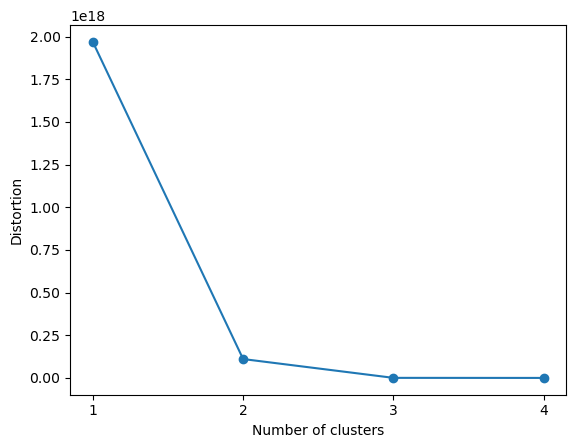

In [169]:
import matplotlib.pyplot as plt

distortions = check_class_num(joined_data_feature["price__abs_energy"])
# グラフのプロット
plt.plot(range(1, 5), distortions, marker="o")
plt.xticks(np.arange(1, 5, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [170]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import defaultdict

def make_div_class(data, class_num):
    n_clusters = class_num

    reshaped_data = np.array(data).reshape(-1, 1)

    km = KMeans(n_clusters=n_clusters,# クラスターの個数 
                n_init=20,               
                max_iter=100,# k-meansアルゴリズムを繰り返す最大回数
                random_state=42)

    # fit_predictメソッドによりクラスタリングを行う
    Y_km = km.fit_predict(reshaped_data)
    PCA_cluster = list(Y_km)

    return PCA_cluster



In [174]:
import matplotlib.pyplot as plt

classes = make_div_class(joined_data_feature["price__agg_autocorrelation__f_agg_\"mean\"__maxlag_40"], 2)


### KS検定で優位な特徴量を摘出する

In [11]:
from scipy.stats import ks_2samp

import numpy as np

# 異常値を検出する関数
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]


def check_KS_value(group1, group2):
    # Kolmogorov-Smirnov検定
    k, p_value = ks_2samp(group1, group2)

    # p値の判定
    if p_value < 0.05:
        return p_value, 1
    else:
        return p_value, 0

In [12]:
good_index = []
p_value_list = []

for i, (key, value) in enumerate(joined_data_feature.items()):
    group1 = remove_outliers(value[:21])
    group2 = remove_outliers(value[21:])
    p_value, result = check_KS_value(list(group1), list(group2))
    if result and (("price__fft" not in key) and ("volume__fft" not in key)):
        good_index.append([i, key])
    p_value_list.append(p_value)


NameError: name 'joined_data_feature' is not defined

In [443]:
good_index

[[59, 'price__partial_autocorrelation__lag_4'],
 [81, 'price__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)'],
 [145, 'price__ar_coefficient__coeff_1__k_10'],
 [163, 'price__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.0'],
 [731, 'volume__longest_strike_below_mean'],
 [770, 'volume__agg_autocorrelation__f_agg_"median"__maxlag_40']]

In [444]:
good_p_value_list = []

for value in good_index:
    good_p_value_list.append(p_value_list[value[0]])

sorted_good_p_value_list_index = np.array(good_p_value_list).argsort()
len(sorted_good_p_value_list_index)

6

In [282]:
good_index[sorted_good_p_value_list_index[9]][1]

'volume__fft_coefficient__attr_"angle"__coeff_77'

In [279]:
display_data = []
a_data = []
b_data = []

for i, value in enumerate(remove_outliers(joined_data_feature[good_index[sorted_good_p_value_list_index[8]][1]])):
    display_data.append(value)
    if i < 21:
        a_data.append(value)
    else:
        b_data.append(value)

38
40
53
71
75
125
131
152
185
188
207
267


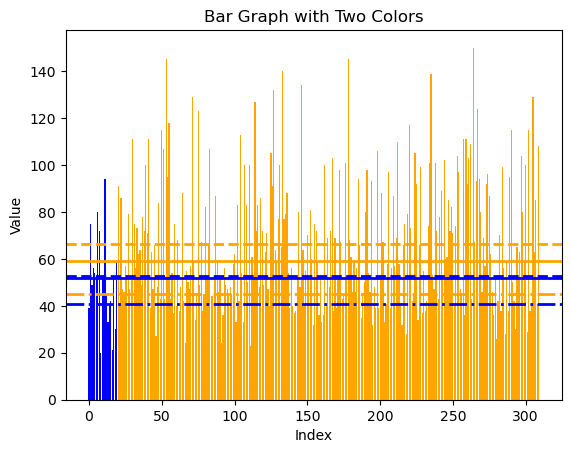

'volume__longest_strike_below_mean'

In [465]:
import numpy as np

display_data = []
a_data = []
b_data = []

index_value = 3

for i, value in enumerate(remove_outliers(joined_data_feature[good_index[sorted_good_p_value_list_index[index_value]][1]])):
    display_data.append(value)
    if i < 21:
        a_data.append(value)
    else:
        b_data.append(value)

# インデックス
indices = np.arange(len(display_data))

a_mean = np.mean(a_data)
b_mean = np.mean(b_data)
a_med = np.median(a_data)
b_med = np.median(b_data)
a_25 = np.percentile(a_data, 25)
b_25 = np.percentile(b_data, 25)
a_75 = np.percentile(a_data, 75)
b_75 = np.percentile(b_data, 75)

# 色を分ける
colors = ['blue'] * 20 + ['orange'] * (len(display_data) - 5)

# プロット
plt.bar(indices, display_data, color=colors)

plt.axhline(y=a_mean, color='blue', linestyle='--', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_mean, color='orange', linestyle='--', linewidth=2, label='Group 2 Mean')
plt.axhline(y=a_med, color='blue', linestyle='-', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_med, color='orange', linestyle='-', linewidth=2, label='Group 2 Mean')
plt.axhline(y=a_25, color='blue', linestyle='-.', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_25, color='orange', linestyle="-.", linewidth=2, label='Group 2 Mean')

# ラベルやタイトルを追加
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Bar Graph with Two Colors")

# 表示
plt.show()

good_index[sorted_good_p_value_list_index[index_value]][1]

In [466]:
print(a_mean, a_med, a_25, a_75)

52.904761904761905 52.0 41.0 59.0


In [467]:
print(b_mean, b_med, b_25, b_75)

66.3287197231834 59.0 45.0 84.0


In [468]:
border_value = (a_75 + b_75) / 2
border_value

71.5

In [316]:
print(good_index[sorted_good_p_value_list_index[15]][1])
print(good_index[sorted_good_p_value_list_index[21]][1])

price__partial_autocorrelation__lag_4
volume__longest_strike_below_mean


## 特徴量の値，閾値

In [326]:
best_feature_data = [
    {
        "name": "price__partial_autocorrelation__lag_4",
        "border": -0.04626578459176222,
        "all_data_mean": -0.02890642623049197,
        "all_data_med": -0.02711438257174632,
        "all_data_25": -0.08710260985137175,
        "delist_data_mean": 0.016673117387264038,
        "delist_data_med": 0.02600533414606185,
        "delist_data_25": -0.005428959332152687,
        "all_data_group": "low"
    },
    {
        "name": "volume__longest_strike_below_mean",
        "border": 43,
        "all_data_mean": 66.3287197231834,
        "all_data_med": 59.0,
        "all_data_75": 84.0,
        "delist_data_mean": 52.904761904761905,
        "delist_data_med": 52.0,
        "delist_data_75": 59.0,
        "all_data_group": "high"
    }
]

### 散布図にしてみる

/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_14862/191310961.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


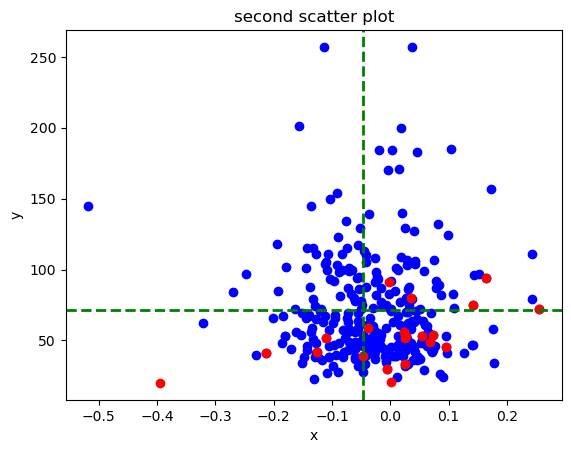

In [17]:
price_partical_data = joined_data_feature["price__partial_autocorrelation__lag_4"]
delist_price_partical_data = price_partical_data[:21]
all_price_partical_data = price_partical_data[21:]
volume_longest_below_mean = joined_data_feature["volume__longest_strike_below_mean"]
delist_volume_longest_below_mean = volume_longest_below_mean[:21]
all_volume_longest_below_mean = volume_longest_below_mean[21:]



import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(all_price_partical_data,all_volume_longest_below_mean, c='blue')
ax.scatter(delist_price_partical_data,delist_volume_longest_below_mean, c='red')

ax.axhline(y=71.5, color='green', linestyle='--', linewidth=2, label='Group 1 Mean')
ax.axvline(x=-0.04626578459176222, color='green', linestyle='--', linewidth=2, label='Group 1 Mean')

ax.set_title('second scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()

In [18]:
all_price_partical_data

1inch                0.126210
aave                 0.030060
aavegotchi          -0.017409
acala               -0.038827
adventure-gold      -0.081145
                       ...   
yield-guild-games    0.025139
zcash                0.004353
zcoin               -0.192126
zelcash             -0.126728
zilliqa             -0.025611
Name: price__partial_autocorrelation__lag_4, Length: 301, dtype: float64

In [22]:
safe_index = []

for i, key in enumerate(all_price_partical_data.keys()):
    if all_price_partical_data[i] < -0.04626578459176222 and all_volume_longest_below_mean[i] > 71.5:
        safe_index.append(key)


In [23]:
safe_index

['alchemy-pay',
 'ampleforth-governance-token',
 'auction',
 'aurora-dao',
 'auto',
 'axl-inu',
 'badger-dao',
 'bakerytoken',
 'bitcoin-cash',
 'chiliz',
 'compound-governance-token',
 'dent',
 'fantom',
 'fc-porto',
 'filecoin',
 'gala',
 'immutable-x',
 'iota',
 'klay-token',
 'kusama',
 'liquity',
 'livepeer',
 'matic-network',
 'metis-token',
 'mina-protocol',
 'moonbeam',
 'near',
 'nervos-network',
 'new-bitshares',
 'pancakeswap-token',
 'ravencoin',
 'render-token',
 'selfkey',
 'singularitynet',
 'stafi',
 'status',
 'stepn',
 'stp-network',
 'swipe',
 'terrausd-wormhole',
 'the-graph',
 'thorchain',
 'tokocrypto',
 'tron-bsc',
 'venus',
 'vulcan-forged',
 'winklink-bsc',
 'woo-network',
 'wrapped-solana',
 'wrapped-ust',
 'zcoin']

In [24]:
import json

with open("data/safe_stock.json", "w") as file:
    json.dump(safe_index, file, indent=4)

In [424]:
# 異常値を検出する関数
def remove_outliers_index(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_index = []
    for i, value in enumerate(data):
        if not(lower_bound <= value <= upper_bound):
            outliers_index.append(i)
    return outliers_index

In [425]:
def remove_data(data, data_list):
    return_data = []
    for i in range(len(data)):
        if i not in data_list:
            return_data.append(data[i])
    return return_data


## 回帰式を作ってみる

In [429]:
logistic_dataframe = pd.DataFrame()
x_list = []
for i in range(len(joined_data_feature)):
    if i < 20:
        x_list.append(0)
    else:
        x_list.append(1)

price_outliner_index = remove_outliers_index(price_partical_data)
volume_outliner_index = remove_outliers_index(volume_longest_below_mean)

mixed_outliner_index = list(set(price_outliner_index + volume_outliner_index))

logistic_dataframe["price"] = remove_data(price_partical_data, mixed_outliner_index)
logistic_dataframe["volume"] = remove_data(volume_longest_below_mean, mixed_outliner_index)
logistic_dataframe["result"] = remove_data(x_list, mixed_outliner_index)
logistic_dataframe

,price,volume,result
0,-0.046534,39.0,0
1,0.141920,75.0,0
2,0.068743,49.0,0
3,0.023057,56.0,0
4,0.072678,54.0,0
...,...,...,...
297,0.025139,129.0,1
298,0.004353,63.0,1
299,-0.192126,85.0,1
300,-0.126728,41.0,1


In [430]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = logistic_dataframe[["price", "volume"]]
Y = logistic_dataframe["result"]

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X, Y) # ロジスティック回帰モデルの重みを学習

print(lr.coef_)
print(lr.intercept_)




[[-0.58653325  0.02719479]]
[1.16946581]


In [437]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(C=1, random_state=42)
svm_model.fit(X, Y)

svm_model.coef_

/Users/hiroki/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[-0.2186579 ,  0.00381194]])

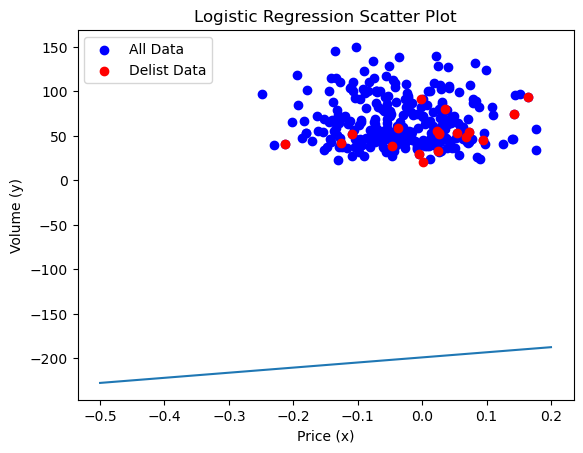

In [438]:
price_partical_data = remove_data(joined_data_feature["price__partial_autocorrelation__lag_4"], mixed_outliner_index)
delist_price_partical_data = price_partical_data[:19]
all_price_partical_data = price_partical_data[19:]
volume_longest_below_mean = remove_data(joined_data_feature["volume__longest_strike_below_mean"], mixed_outliner_index)
delist_volume_longest_below_mean = volume_longest_below_mean[:19]
all_volume_longest_below_mean = volume_longest_below_mean[19:]




# プロットの設定
fig, ax = plt.subplots()

# 軸の範囲
x_min, x_max = -0.5, 0.2  # x軸の範囲
x = np.linspace(x_min, x_max, 1000)
y = (-svm_model.coef_[0, 0] * x - svm_model.intercept_[0]) / svm_model.coef_[0, 1]

plt.plot(x, y)

# データポイントのプロット
ax.scatter(all_price_partical_data, all_volume_longest_below_mean, c='blue', label='All Data')
ax.scatter(delist_price_partical_data, delist_volume_longest_below_mean, c='red', label='Delist Data')


# サポートベクトル


# グラフのラベルとタイトル
ax.set_title('Logistic Regression Scatter Plot')
ax.set_xlabel('Price (x)')
ax.set_ylabel('Volume (y)')
ax.legend()

# プロットを表示
plt.show()    



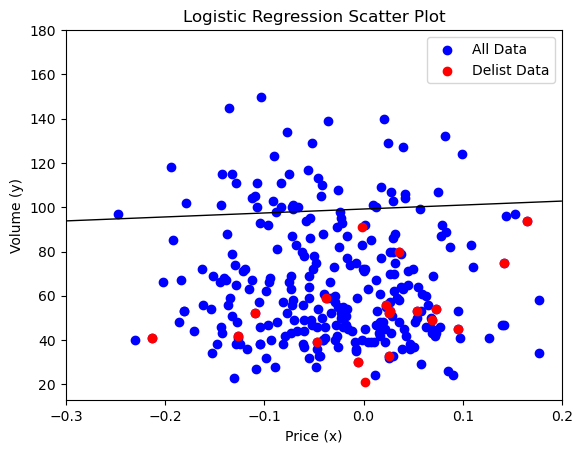

Z min: 0.9111276294592718 Z max: 0.9984159648023654


In [441]:
price_partical_data = remove_data(joined_data_feature["price__partial_autocorrelation__lag_4"], mixed_outliner_index)
delist_price_partical_data = price_partical_data[:19]
all_price_partical_data = price_partical_data[19:]
volume_longest_below_mean = remove_data(joined_data_feature["volume__longest_strike_below_mean"], mixed_outliner_index)
delist_volume_longest_below_mean = volume_longest_below_mean[:19]
all_volume_longest_below_mean = volume_longest_below_mean[19:]
# 軸の範囲
x_min, x_max = -0.3, 0.2  # x軸の範囲
y_min, y_max = 50, 180  # y軸の範囲
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

coefficient = np.array([[-0.53096318, 0.02964024]])  # ロジスティック回帰の係数
intercept = np.array([0.95166232])                  # 切片

# coefficient = np.array([[-0.58653325, 0.02719479]])  # ロジスティック回帰の係数
# intercept = np.array([1.16946581])                  # 切片

# 予測の計算
Z = coefficient[0, 0] * xx + coefficient[0, 1] * yy + intercept
Z = 1 / (1 + np.exp(-Z))  # ロジスティック関数

# プロットの設定
fig, ax = plt.subplots()

# データポイントのプロット
ax.scatter(all_price_partical_data, all_volume_longest_below_mean, c='blue', label='All Data')
ax.scatter(delist_price_partical_data, delist_volume_longest_below_mean, c='red', label='Delist Data')

# 決定境界のプロット
contour = ax.contour(xx, yy, Z, levels=[0.98], colors="black", linewidths=1)

# グラフのラベルとタイトル
ax.set_title('Logistic Regression Scatter Plot')
ax.set_xlabel('Price (x)')
ax.set_ylabel('Volume (y)')
ax.legend()

# プロットを表示
plt.show()        # 再描画
print("Z min:", Z.min(), "Z max:", Z.max())

In [ ]:
features_index = [[15, "low"], [21, "high"], [], [2, "high"], [9, "low"], [14, "high"]]

In [190]:
def check_rate(class_value):
    delist_num = 0
    num = 0
    info = []

    for i in range(len(class_value)):
        if class_value[i] == 1 and i < 20:
            info.append(i)
            delist_num += 1
        elif class_value[i] == 1:
            num += 1
            info.append(i)
    
    delist_total = len(delisted_non_binary_features)
    all_total = len(all_non_binary_features)

    delist_rate = delist_num/delist_total
    all_rate = num/all_total

    dis_rate = abs(delist_rate-all_rate)
    
    return dis_rate

In [193]:
rate_list = []
for key, value in joined_data_feature.items():
    class_data = make_div_class(joined_data_feature[key], 2)
    ans_rate = check_rate(class_data)
    rate_list.append(ans_rate)

In [194]:
rate_list

[0.006600660066006601,
 0.0033003300330033004,
 0.0033003300330033004,
 0.009900990099009901,
 0.009900990099009901,
 0.006600660066006601,
 0.006600660066006601,
 0.0033003300330033004,
 0.010396039603960398,
 0.0033003300330033004,
 0.09141914191419143,
 0.037293729372937304,
 0.006600660066006601,
 0.0033003300330033004,
 0.0026402640264026056,
 0.15544554455445547,
 0.09917491749174911,
 0.029867986798679858,
 0.023762376237623783,
 0.023762376237623783,
 0.050825082508250796,
 0.050825082508250796,
 0.08283828382838287,
 0.006600660066006601,
 0.006600660066006601,
 0.0033003300330033004,
 0.04785478547854788,
 0.0033003300330033004,
 0.0033003300330033004,
 0.0033003300330033004,
 0.0033003300330033004,
 0.0033003300330033004,
 0.0033003300330033004,
 0.029867986798679858,
 0.0033003300330033004,
 0.0033003300330033004,
 0.0033003300330033004,
 0.0033003300330033004,
 0.0033003300330033004,
 0.006600660066006601,
 0.006600660066006601,
 0.006600660066006601,
 0.006600660066006601

In [207]:
max_index = rate_list.index(max(rate_list))

sorted_list = sorted(rate_list, reverse=True)

max_data = joined_data_feature.iloc[:, max_index]

max_data

aragon                       161.488000
barnbridge                  -113.929526
concentrated-voting-power    122.182957
drep-new                    -148.917725
ethos                       -135.494494
                                ...    
yield-guild-games             45.576605
zcash                        -87.273888
zcoin                        135.155900
zelcash                      132.470282
zilliqa                      119.875754
Name: price__fft_coefficient__attr_"angle"__coeff_89, Length: 322, dtype: float64

In [211]:

display_data = []
a_data = []
b_data = []

for i, value in enumerate(max_data):
    display_data.append(value)
    if i < 21:
        a_data.append(value)
    else:
        b_data.append(value)


In [220]:
from scipy.stats import ks_2samp

# Kolmogorov-Smirnov検定
ks_stat, p_value = ks_2samp(a_data, b_data)

print("KS-statistic:", ks_stat)
print("p-value:", p_value)

# p値の判定
if p_value < 0.05:
    print("グループ間に統計的に有意な差があります。")
else:
    print("グループ間に統計的な差はありません。")

KS-statistic: 0.26135105204872644
p-value: 0.11388742098324514
グループ間に統計的な差はありません。


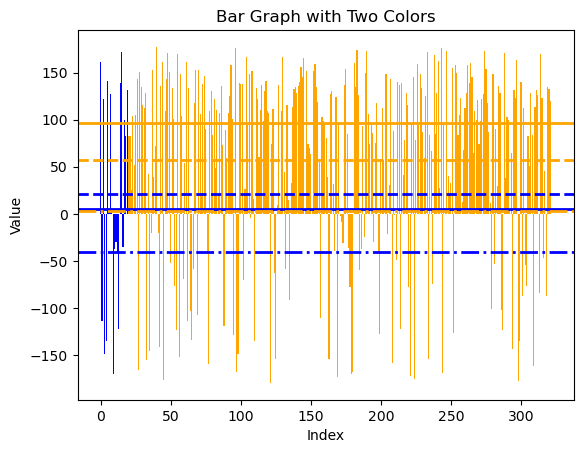

In [218]:
import numpy as np

# インデックス
indices = np.arange(len(display_data))

a_mean = np.mean(a_data)
b_mean = np.mean(b_data)
a_med = np.median(a_data)
b_med = np.median(b_data)
a_25 = np.percentile(a_data, 25)
b_25 = np.percentile(b_data, 25)

# 色を分ける
colors = ['blue'] * 20 + ['orange'] * (len(display_data) - 5)

# プロット
plt.bar(indices, display_data, color=colors)

plt.axhline(y=a_mean, color='blue', linestyle='--', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_mean, color='orange', linestyle='--', linewidth=2, label='Group 2 Mean')
plt.axhline(y=a_med, color='blue', linestyle='-', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_med, color='orange', linestyle='-', linewidth=2, label='Group 2 Mean')
plt.axhline(y=a_25, color='blue', linestyle='-.', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_25, color='orange', linestyle="-.", linewidth=2, label='Group 2 Mean')

# ラベルやタイトルを追加
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Bar Graph with Two Colors")

# 表示
plt.show()